In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the built-in Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Check for missing values in 'age' and 'sex' columns
print("Missing values before cleaning:")
print(titanic[['age', 'sex']].isnull().sum())

# Drop rows where 'age' or 'sex' is missing
titanic_cleaned = titanic.dropna(subset=['age', 'sex', 'survived'])

# Confirm the missing values are removed
print("\nMissing values after cleaning:")
print(titanic_cleaned[['age', 'sex']].isnull().sum())


Missing values before cleaning:
age    177
sex      0
dtype: int64

Missing values after cleaning:
age    0
sex    0
dtype: int64


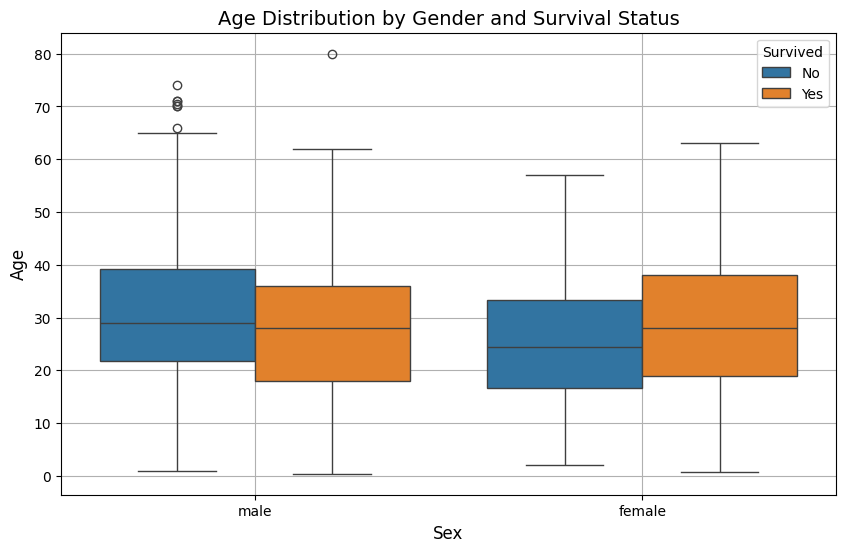

In [4]:
# Make sure we are modifying a copy of the DataFrame
titanic_cleaned = titanic.dropna(subset=['age', 'sex', 'survived']).copy()

# Now safely map 'survived' to 'survival_status'
titanic_cleaned['survival_status'] = titanic_cleaned['survived'].map({0: 'No', 1: 'Yes'})

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create the box plot with proper hues
sns.boxplot(x='sex', y='age', hue='survival_status', data=titanic_cleaned)

# Customize plot appearance
plt.title('Age Distribution by Gender and Survival Status', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Survived')
plt.grid(True)

# Show plot
plt.show()
